In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("Sleep_Data_Sampled.csv")
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,35,Doctor,6.65,7,50,7,Normal Weight,120/80,71,7100,Healthy
1,2,Male,42,Teacher,6.90,8,52,4,Normal,135/90,66,7000,Healthy
2,3,Male,34,Software Engineer,6.95,7,66,6,Overweight,126/83,74,6100,Healthy
3,4,Male,32,Doctor,6.90,6,52,7,Normal,120/80,71,6500,Healthy
4,5,Male,37,Lawyer,6.85,7,60,6,Normal,125/80,71,6500,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14996,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
14996,14997,Female,59,Nurse,8.00,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
14997,14998,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
14998,14999,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [3]:
data.shape

(15000, 13)

## EDA (Exploratory Data Analysis)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                15000 non-null  int64  
 1   Gender                   15000 non-null  object 
 2   Age                      15000 non-null  int64  
 3   Occupation               15000 non-null  object 
 4   Sleep Duration           15000 non-null  float64
 5   Quality of Sleep         15000 non-null  int64  
 6   Physical Activity Level  15000 non-null  int64  
 7   Stress Level             15000 non-null  int64  
 8   BMI Category             15000 non-null  object 
 9   Blood Pressure           15000 non-null  object 
 10  Heart Rate               15000 non-null  int64  
 11  Daily Steps              15000 non-null  int64  
 12  Sleep Disorder           15000 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usage: 1.5+ MB


In [5]:
data.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [6]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: Index(['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps'],
      dtype='object')
Categorical Columns: Index(['Gender', 'Occupation', 'BMI Category', 'Blood Pressure',
       'Sleep Disorder'],
      dtype='object')


In [7]:
data.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
unique_value = []

for i in data.columns:
    current_column = data[i].value_counts().count()
    unique_value.append(current_column)
    
pd.DataFrame(unique_value, index = data.columns, columns = ["Total Unique Values"])

,Total Unique Values
Person ID,15000
Gender,2
Age,33
Occupation,11
Sleep Duration,55
Quality of Sleep,6
Physical Activity Level,37
Stress Level,6
BMI Category,4
Blood Pressure,25


In [10]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7500.500000,44.130667,6.997327,7.131267,59.925000,5.654800,70.857533,6795.080000
std,4330.271354,6.840091,0.615187,1.053111,16.814374,1.393568,3.614836,1329.706484
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,3750.750000,40.000000,6.500000,6.000000,45.000000,4.000000,68.000000,6000.000000
50%,7500.500000,44.000000,7.000000,7.000000,60.000000,6.000000,70.000000,6500.000000
75%,11250.250000,48.000000,7.450000,8.000000,75.000000,6.000000,72.000000,7600.000000
max,15000.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [11]:
data.describe(include='object').T

,count,unique,top,freq
Gender,15000,2,Female,8569
Occupation,15000,11,Nurse,4316
BMI Category,15000,4,Overweight,8755
Blood Pressure,15000,25,130/85,4194
Sleep Disorder,15000,3,Healthy,5000


In [12]:
data.drop(columns = ['Person ID'], inplace = True)
data

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,35,Doctor,6.65,7,50,7,Normal Weight,120/80,71,7100,Healthy
1,Male,42,Teacher,6.90,8,52,4,Normal,135/90,66,7000,Healthy
2,Male,34,Software Engineer,6.95,7,66,6,Overweight,126/83,74,6100,Healthy
3,Male,32,Doctor,6.90,6,52,7,Normal,120/80,71,6500,Healthy
4,Male,37,Lawyer,6.85,7,60,6,Normal,125/80,71,6500,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
14996,Female,59,Nurse,8.00,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
14997,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
14998,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [13]:
data['Gender'].value_counts()

Female    8569
Male      6431
Name: Gender, dtype: int64

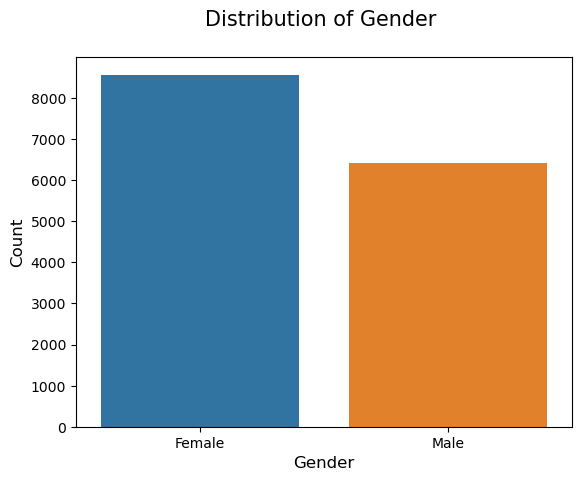

In [14]:
ax = sns.barplot(x = data['Gender'].value_counts().index, y = data['Gender'].value_counts())
plt.xlabel('Gender', size = 12)
plt.xticks(size = 10)
plt.ylabel('Count', size = 12)
plt.title('Distribution of Gender \n', size = 15)
plt.show()

In [15]:
data['Age'].value_counts()

44    2883
54    1273
48    1011
42     867
50     865
46     863
36     832
40     822
38     656
34     552
43     550
58     441
37     313
32     303
39     272
45     260
41     255
35     245
53     194
30     189
47     187
52     180
49     176
59     165
33     142
31     113
57      98
55      86
51      79
56      53
29      44
28      30
27       1
Name: Age, dtype: int64

In [16]:
data['Occupation'].value_counts()

Nurse                   4316
Teacher                 2199
Salesperson             1974
Doctor                  1856
Engineer                1719
Lawyer                  1340
Accountant              1134
Scientist                193
Software Engineer        132
Sales Representative     115
Manager                   22
Name: Occupation, dtype: int64

In [17]:
lowest_sleep_duration = data['Sleep Duration'].min()
print(f'Lowest Sleep Duration: {lowest_sleep_duration} hours')

highest_sleep_duration = data['Sleep Duration'].max()
print(f'Highest Sleep Duration: {highest_sleep_duration} hours')

Lowest Sleep Duration: 5.8 hours
Highest Sleep Duration: 8.5 hours


In [18]:
data['Quality of Sleep'].value_counts()

8    5858
6    5212
7    2523
9    1044
5     324
4      39
Name: Quality of Sleep, dtype: int64

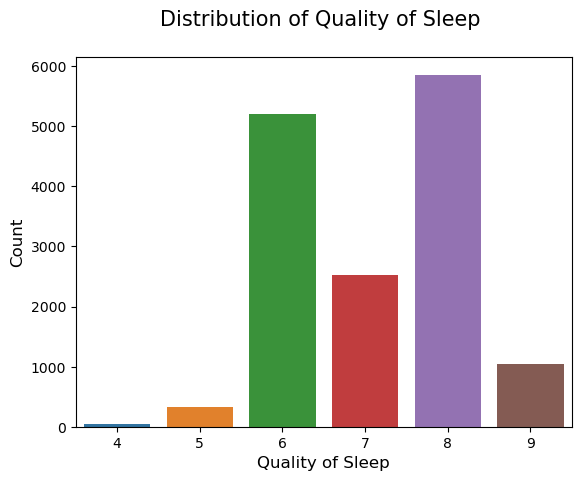

In [19]:
ax = sns.barplot(x = data['Quality of Sleep'].value_counts().index, y = data['Quality of Sleep'].value_counts())
plt.xlabel('Quality of Sleep', size = 12)
plt.xticks(size = 10)
plt.ylabel('Count', size = 12)
plt.title('Distribution of Quality of Sleep \n', size = 15)
plt.show()

In [20]:
lowest_PAL = data['Physical Activity Level'].min()
print(f'Lowest Physical Activity Level: {lowest_PAL}')

highest_PAL = data['Physical Activity Level'].max()
print(f'Highest Physical Activity Level: {highest_PAL}')

Lowest Physical Activity Level: 30
Highest Physical Activity Level: 90


In [21]:
data['Stress Level'].value_counts()

6    6161
4    3072
7    1811
8    1687
5    1294
3     975
Name: Stress Level, dtype: int64

In [22]:
data['BMI Category'].value_counts()

Overweight       8755
Normal           4962
Obese             659
Normal Weight     624
Name: BMI Category, dtype: int64

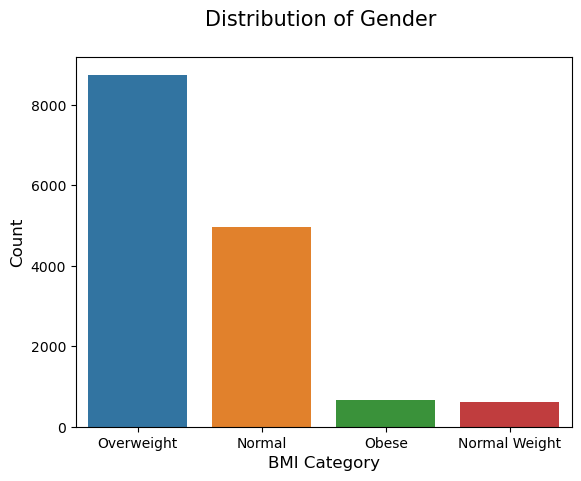

In [23]:
ax = sns.barplot(x = data['BMI Category'].value_counts().index, y = data['BMI Category'].value_counts())
plt.xlabel('BMI Category', size = 12)
plt.xticks(size = 10)
plt.ylabel('Count', size = 12)
plt.title('Distribution of Gender \n', size = 15)
plt.show()

In [24]:
lowest_BP = data['Blood Pressure'].min()
print(f'Lowest BP: {lowest_BP}')

highest_BP = data['Blood Pressure'].max()
print(f'Highest BP: {highest_BP}')

Lowest BP: 115/75
Highest BP: 142/92


In [25]:
data['Heart Rate'].value_counts()

68    3730
72    3267
70    1371
69    1071
75     876
65     822
71     672
74     642
66     628
76     536
78     428
80     327
73     269
77     192
82      53
79      28
84      20
83      18
67      17
85      13
81      13
86       7
Name: Heart Rate, dtype: int64

In [26]:
lowest_DS = data['Daily Steps'].min()
print(f'Lowest Daily Steps: {lowest_DS} Steps')

highest_DS = data['Daily Steps'].max()
print(f'Highest Daily Steps: {highest_DS} Steps')

Lowest Daily Steps: 3000 Steps
Highest Daily Steps: 10000 Steps


In [27]:
data['Sleep Disorder'].value_counts()

Healthy        5000
Sleep Apnea    5000
Insomnia       5000
Name: Sleep Disorder, dtype: int64

### Find Skewness

In [28]:
# Calculate skewness for each numerical column
skewness = data.select_dtypes(include=[np.number]).skew()
print("Skewness:")
print(skewness)

Skewness:
Age                        0.097985
Sleep Duration             0.346637
Quality of Sleep          -0.070315
Physical Activity Level    0.204935
Stress Level              -0.150428
Heart Rate                 0.735076
Daily Steps                0.464187
dtype: float64


In [29]:
# Calculate Kurtosis for each numerical column
Kurtosis = data.select_dtypes(include=[np.number]).skew()
print("Kurtosis:")
print(Kurtosis)

Kurtosis:
Age                        0.097985
Sleep Duration             0.346637
Quality of Sleep          -0.070315
Physical Activity Level    0.204935
Stress Level              -0.150428
Heart Rate                 0.735076
Daily Steps                0.464187
dtype: float64


### Find outliers using IQR method

In [30]:
# Function to detect outliers using IQR method
def detect_outliers(df):
    outliers = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

# Detect outliers
outliers = detect_outliers(data)

# Display outliers
for column, outlier_values in outliers.items():
    print(f"{column} outliers: {outlier_values.count()}")

# Optionally, you can save the outliers to a CSV file
outliers_df = pd.DataFrame({k: pd.Series(v) for k, v in outliers.items()})
outliers_df.to_csv('outliers.csv', index=False)

Age outliers: 1
Sleep Duration outliers: 0
Quality of Sleep outliers: 0
Physical Activity Level outliers: 0
Stress Level outliers: 0
Heart Rate outliers: 479
Daily Steps outliers: 55


In [31]:
# Calculate the first and third quartile
q1 = data.quantile(0.25, numeric_only=True)
q3 = data.quantile(0.75, numeric_only=True)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Align data for comparison
data_aligned, lower_bound_aligned = data.align(lower_bound, axis=1, copy=False)
data_aligned, upper_bound_aligned = data.align(upper_bound, axis=1, copy=False)

# Identify outliers
outliers = ((data_aligned < lower_bound_aligned) | (data_aligned > upper_bound_aligned)).any(axis=1)

# Remove outliers
data_cleaned = data[~outliers]

# Save or display the cleaned data
data_cleaned.shape

(14520, 12)

In [32]:
data_cleaned

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,35,Doctor,6.65,7,50,7,Normal Weight,120/80,71,7100,Healthy
1,Male,42,Teacher,6.90,8,52,4,Normal,135/90,66,7000,Healthy
2,Male,34,Software Engineer,6.95,7,66,6,Overweight,126/83,74,6100,Healthy
3,Male,32,Doctor,6.90,6,52,7,Normal,120/80,71,6500,Healthy
4,Male,37,Lawyer,6.85,7,60,6,Normal,125/80,71,6500,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
14996,Female,59,Nurse,8.00,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
14997,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
14998,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [33]:
data = data_cleaned

### Visualization

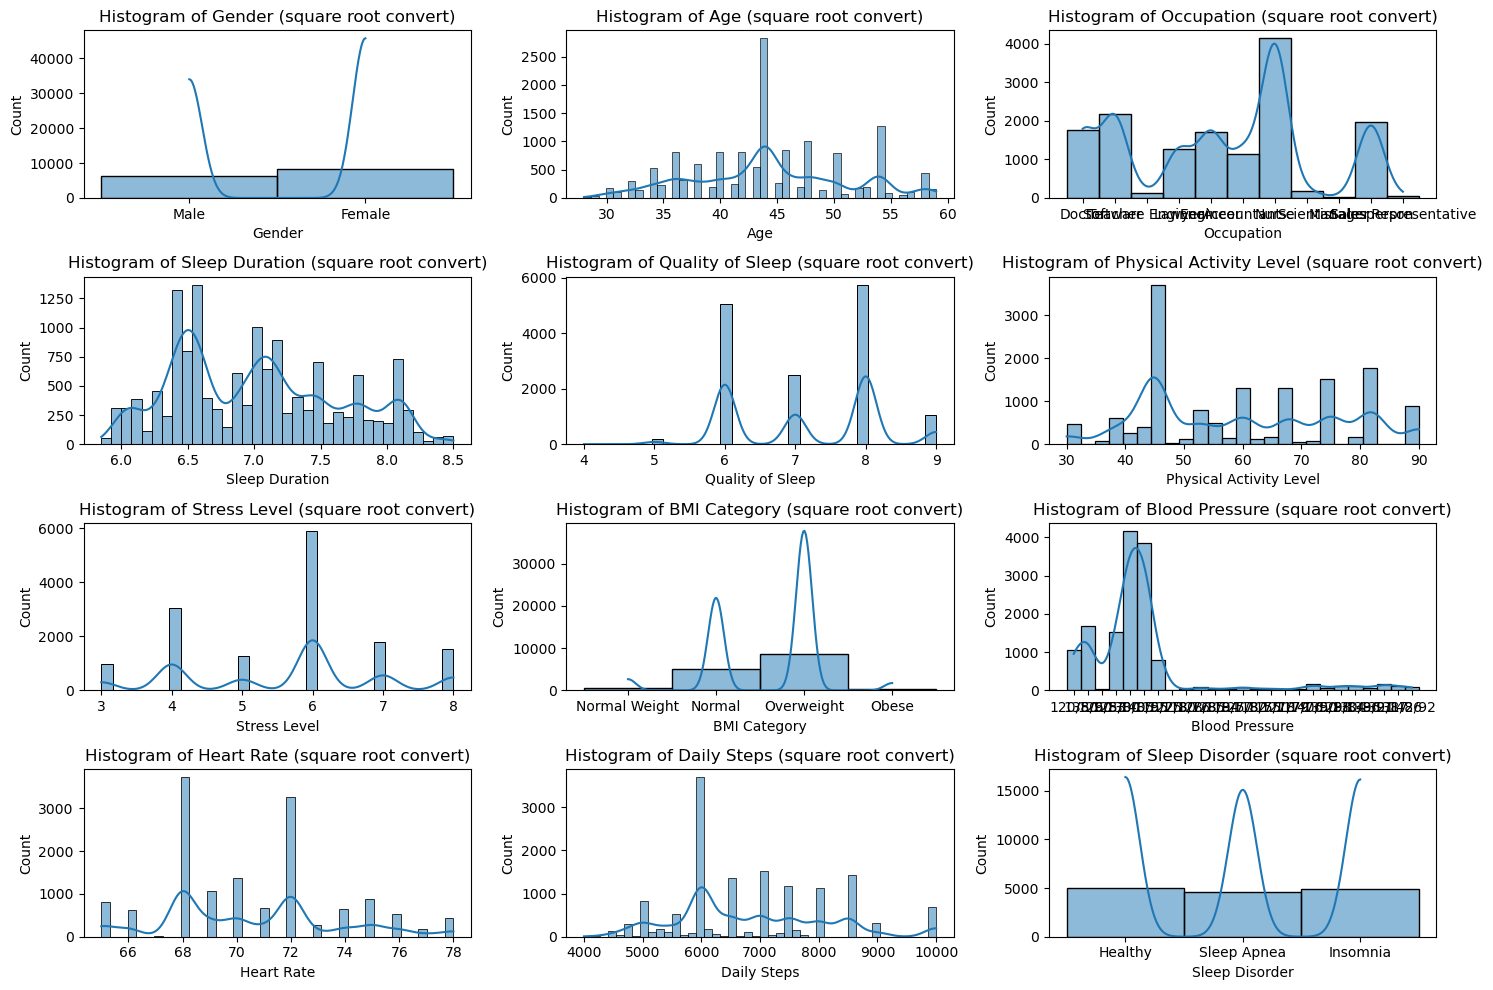

In [34]:
columns_to_convert = ['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_convert, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col} (square root convert)')
plt.tight_layout()
plt.show()

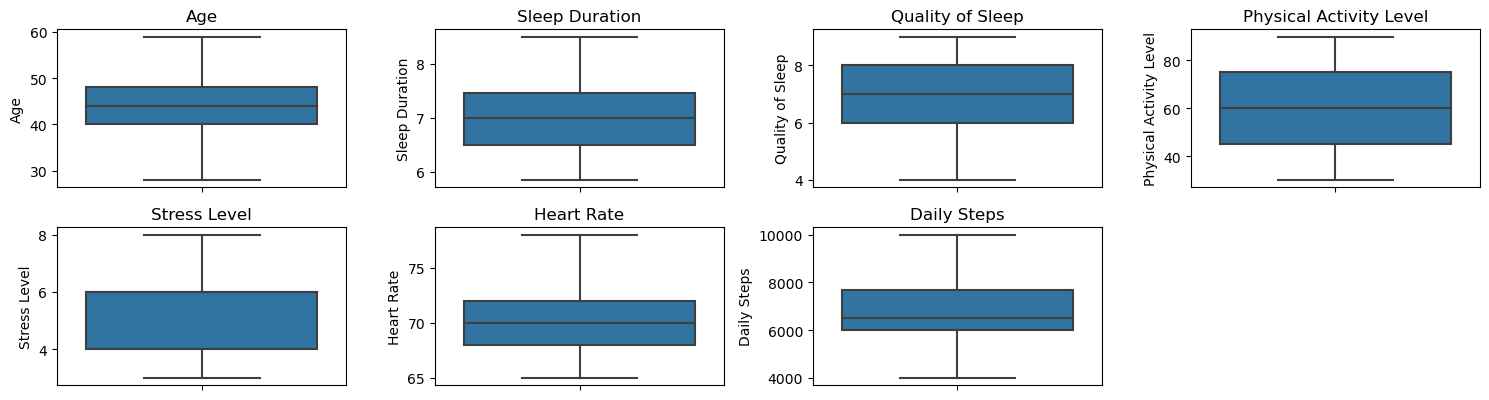

In [35]:
plt.figure(figsize = (15, 10))
for i, col in enumerate(data.select_dtypes(include = ['int64', 'float64']).columns):
    plt.subplot(5, 4, i+1)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_24972\3499039982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Occupation'] = data['Occupation'].astype('category')
C:\Users\HP\AppData\Local\Temp\ipykernel_24972\3499039982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sleep Disorder'] = data['Sleep Disorder'].astype('category')


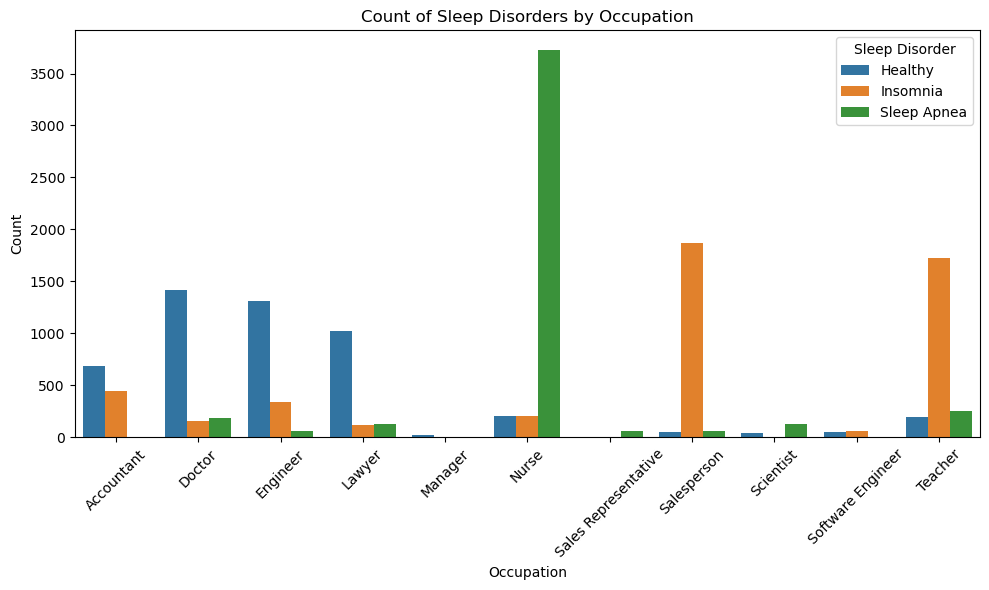

In [36]:
# Ensure 'Occupation' and 'Sleep Disorder' are treated as categorical variables
data['Occupation'] = data['Occupation'].astype('category')
data['Sleep Disorder'] = data['Sleep Disorder'].astype('category')

# Create a count plot to show the relationship between 'Occupation' and 'Sleep Disorder'
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Occupation', hue='Sleep Disorder')
plt.title('Count of Sleep Disorders by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(title='Sleep Disorder', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_24972\753079882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Occupation'] = data['Occupation'].astype('category')


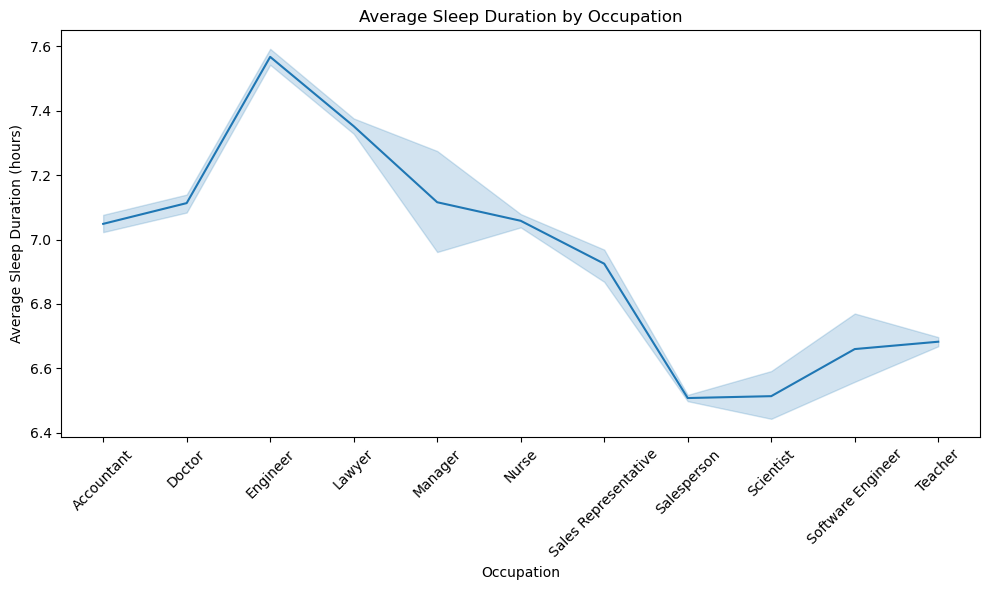

In [37]:
# Ensure 'Occupation' is treated as a categorical variable
data['Occupation'] = data['Occupation'].astype('category')

# Calculate the average sleep duration for each occupation
average_sleep_duration = data.groupby('Occupation')['Sleep Duration'].mean().reset_index()

# Sort by average sleep duration for a better visualization
average_sleep_duration = average_sleep_duration.sort_values(by='Sleep Duration')

# Create a line chart to show the relationship between 'Occupation' and 'Sleep Duration'
plt.figure(figsize=(10, 6))
# plt.plot(average_sleep_duration['Occupation'], average_sleep_duration['Sleep Duration'], marker='o')
sns.lineplot(data = data, x = 'Occupation', y ='Sleep Duration')
plt.title('Average Sleep Duration by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Sleep Duration (hours)')
plt.xticks(rotation = 45)
# plt.grid(True)
plt.tight_layout()
plt.show()

### Encoding Target Column(Sleep Disorder) using Label Encoding

In [38]:
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,35,Doctor,6.65,7,50,7,Normal Weight,120/80,71,7100,Healthy
1,Male,42,Teacher,6.90,8,52,4,Normal,135/90,66,7000,Healthy
2,Male,34,Software Engineer,6.95,7,66,6,Overweight,126/83,74,6100,Healthy
3,Male,32,Doctor,6.90,6,52,7,Normal,120/80,71,6500,Healthy
4,Male,37,Lawyer,6.85,7,60,6,Normal,125/80,71,6500,Healthy


In [39]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Sleep Disorder' column
data['Sleep Disorder'] = label_encoder.fit_transform(data['Sleep Disorder'])

# Display the first few rows to verify the changes
data.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_24972\3006092986.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sleep Disorder'] = label_encoder.fit_transform(data['Sleep Disorder'])


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,35,Doctor,6.65,7,50,7,Normal Weight,120/80,71,7100,0
1,Male,42,Teacher,6.90,8,52,4,Normal,135/90,66,7000,0
2,Male,34,Software Engineer,6.95,7,66,6,Overweight,126/83,74,6100,0
3,Male,32,Doctor,6.90,6,52,7,Normal,120/80,71,6500,0
4,Male,37,Lawyer,6.85,7,60,6,Normal,125/80,71,6500,0


In [40]:
data['Sleep Disorder'].value_counts()

0    4999
1    4922
2    4599
Name: Sleep Disorder, dtype: int64

### Encoding categorical values using One-hot Encoding

In [41]:
no_out = data
df_encoded = pd.get_dummies(no_out, columns = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure'])

In [42]:
df_encoded.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Gender_Female,Gender_Male,...,Blood Pressure_130/85,Blood Pressure_130/86,Blood Pressure_131/86,Blood Pressure_132/87,Blood Pressure_135/88,Blood Pressure_135/90,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92
0,35,6.65,7,50,7,71,7100,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,42,6.90,8,52,4,66,7000,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,34,6.95,7,66,6,74,6100,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,32,6.90,6,52,7,71,6500,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,37,6.85,7,60,6,71,6500,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df_encoded.shape

(14520, 50)

In [44]:
data = df_encoded

In [45]:
data

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Gender_Female,Gender_Male,...,Blood Pressure_130/85,Blood Pressure_130/86,Blood Pressure_131/86,Blood Pressure_132/87,Blood Pressure_135/88,Blood Pressure_135/90,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92
0,35,6.65,7,50,7,71,7100,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,42,6.90,8,52,4,66,7000,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,34,6.95,7,66,6,74,6100,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,32,6.90,6,52,7,71,6500,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,37,6.85,7,60,6,71,6500,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,59,8.10,9,75,3,68,7000,2,1,0,...,0,0,0,0,0,0,0,0,1,0
14996,59,8.00,9,75,3,68,7000,2,1,0,...,0,0,0,0,0,0,0,0,1,0
14997,59,8.10,9,75,3,68,7000,2,1,0,...,0,0,0,0,0,0,0,0,1,0
14998,59,8.10,9,75,3,68,7000,2,1,0,...,0,0,0,0,0,0,0,0,1,0


### Feature selection

In [46]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2

# Assume your processed DataFrame is df, with 52 columns and 14520 rows
# And 'YourTargetColumn' is the name of the target column

# Separate features and target variable
X = df_encoded.drop('Sleep Disorder', axis=1)
y = df_encoded['Sleep Disorder']

# Apply SelectKBest to extract top k best features
k = 12  # Adjust k to select the number of top features you want
bestfeatures = SelectKBest(score_func=chi2, k=k)
fit = bestfeatures.fit(X, y)

# Get the selected feature names
selected_features = X.columns[fit.get_support()]

print("Selected features:", selected_features)
X_new = fit.transform(X)

Selected features: Index(['Age', 'Physical Activity Level', 'Daily Steps', 'Occupation_Nurse',
       'Occupation_Salesperson', 'Occupation_Teacher', 'BMI Category_Normal',
       'BMI Category_Overweight', 'Blood Pressure_125/80',
       'Blood Pressure_130/85', 'Blood Pressure_135/90',
       'Blood Pressure_140/95'],
      dtype='object')


In [47]:
# If you want to convert the transformed array back to a DataFrame
X_new_df = pd.DataFrame(X_new, columns=selected_features)

# Display the DataFrame with the selected features
X_new_df.head()

,Age,Physical Activity Level,Daily Steps,Occupation_Nurse,Occupation_Salesperson,Occupation_Teacher,BMI Category_Normal,BMI Category_Overweight,Blood Pressure_125/80,Blood Pressure_130/85,Blood Pressure_135/90,Blood Pressure_140/95
0,35.0,50.0,7100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,42.0,52.0,7000.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,34.0,66.0,6100.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,32.0,52.0,6500.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,37.0,60.0,6500.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


### Split Dataset

In [48]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11616, 49), (2904, 49), (11616,), (2904,))

 ### Logistic regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [51]:
# Predict on the test set
y_pred = log_reg.predict(X_test)

In [52]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [53]:
# Print the evaluation results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9094352617079889
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      1026
           1       0.93      0.90      0.91       981
           2       0.91      0.90      0.91       897

    accuracy                           0.91      2904
   macro avg       0.91      0.91      0.91      2904
weighted avg       0.91      0.91      0.91      2904

Confusion Matrix:
 [[954  31  41]
 [ 63 878  40]
 [ 50  38 809]]


### Decision tree

In [54]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [55]:
# Predict on the test set
y_pred = decision_tree.predict(X_test)

In [56]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [57]:
# Print the evaluation results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9542011019283747
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1026
           1       0.97      0.95      0.96       981
           2       0.95      0.96      0.95       897

    accuracy                           0.95      2904
   macro avg       0.95      0.95      0.95      2904
weighted avg       0.95      0.95      0.95      2904

Confusion Matrix:
 [[977  19  30]
 [ 31 931  19]
 [ 22  12 863]]


### Naive Bayes

In [58]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model
naive_bayes = GaussianNB()

# Train the model
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [59]:
# Predict on the test set
y_pred = naive_bayes.predict(X_test)

In [60]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [61]:
# Print the evaluation results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9173553719008265
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92      1026
           1       0.93      0.90      0.91       981
           2       0.93      0.90      0.92       897

    accuracy                           0.92      2904
   macro avg       0.92      0.92      0.92      2904
weighted avg       0.92      0.92      0.92      2904

Confusion Matrix:
 [[973  22  31]
 [ 70 881  30]
 [ 41  46 810]]


### Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
random_forest = RandomForestClassifier(random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [63]:
# Predict on the test set
y_pred = random_forest.predict(X_test)

In [64]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [65]:
# Print the evaluation results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9603994490358126
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1026
           1       0.97      0.96      0.96       981
           2       0.95      0.96      0.96       897

    accuracy                           0.96      2904
   macro avg       0.96      0.96      0.96      2904
weighted avg       0.96      0.96      0.96      2904

Confusion Matrix:
 [[987  15  24]
 [ 24 938  19]
 [ 19  14 864]]


### Adaboost

In [66]:
from sklearn.ensemble import AdaBoostClassifier

# Train the AdaBoost model
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)

AdaBoostClassifier()

In [67]:
# Make predictions
y_pred = adaboost.predict(X_test)

In [68]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [69]:
# Print the evaluation results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8842975206611571
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1026
           1       0.91      0.91      0.91       981
           2       0.92      0.82      0.87       897

    accuracy                           0.88      2904
   macro avg       0.89      0.88      0.88      2904
weighted avg       0.89      0.88      0.88      2904

Confusion Matrix:
 [[941  52  33]
 [ 61 892  28]
 [130  32 735]]


### Hyperparameter Tuning

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
224 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\uti

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score: 0.9544589649416186
Test Set Accuracy: 0.9552341597796143
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1026
           1       0.97      0.94      0.96       981
           2       0.94      0.97      0.95       897

    accuracy                           0.96      2904
   macro avg       0.96      0.96      0.96      2904
weighted avg       0.96      0.96      0.96      2904



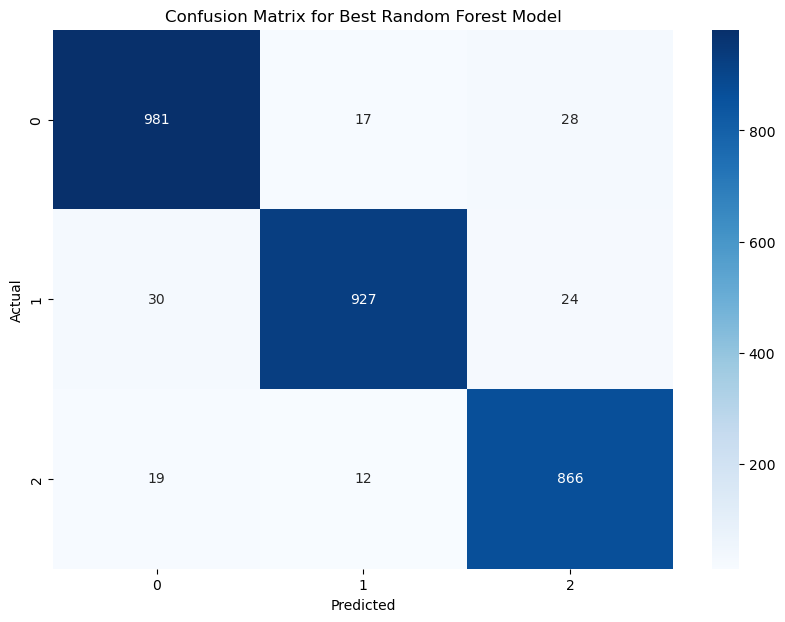

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the random forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the model's performance
accuracy_best = accuracy_score(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best)
cm_best = confusion_matrix(y_test, y_pred_best)

print(f'Test Set Accuracy: {accuracy_best}')
print('Classification Report:')
print(report_best)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Best Random Forest Model')
plt.show()